In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Տվյալների EDA

In [106]:
# import անենք դատան և դարձնենք դատաֆրեյմ
df = pd.read_csv("Gaming_Hours_vs_Performance_1000_Rows.csv")

In [107]:
# տպենք առաջին 5 տողը որպեսզի մոտավոր պատկերացնում կազմենք կառուցվացքի մասին
df.head()

,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


In [108]:
# տպենք դատայի չափսերը
df.shape

(1000, 14)

In [109]:
# տպենք ընդհանուր ինֆո դատայի մասին
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Occupation              1000 non-null   object 
 4   Game_Type               1000 non-null   object 
 5   Daily_Gaming_Hours      1000 non-null   float64
 6   Weekly_Gaming_Hours     1000 non-null   float64
 7   Primary_Gaming_Time     1000 non-null   object 
 8   Sleep_Hours             1000 non-null   float64
 9   Stress_Level            1000 non-null   int64  
 10  Focus_Level             1000 non-null   int64  
 11  Academic_or_Work_Score  1000 non-null   int64  
 12  Productivity_Level      1000 non-null   int64  
 13  Performance_Impact      1000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory

In [110]:
# տպենք թվային արժեքների մասին ընդհանուր ինֆորմացիան
df.describe()

,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,26.600000,3.320300,23.242100,6.479500,5.454000,6.065000,75.07800,75.275000
std,5.207218,1.613059,11.291414,1.155848,2.281905,2.010178,11.67494,12.058805
min,18.000000,0.500000,3.500000,4.500000,2.000000,3.000000,55.00000,50.000000
25%,22.000000,2.000000,14.000000,5.475000,3.000000,4.000000,65.00000,65.000000
50%,27.000000,3.300000,23.100000,6.500000,5.000000,6.000000,75.00000,75.000000
75%,31.000000,4.800000,33.600000,7.500000,7.000000,8.000000,85.00000,86.000000
max,35.000000,6.000000,42.000000,8.500000,9.000000,9.000000,95.00000,100.000000


In [111]:
# տպենք ունիկալ տարիքների քանակները
df["Age"].value_counts()

Age
22    69
30    66
34    65
31    63
24    58
35    57
20    56
29    56
19    54
21    53
27    53
28    52
32    51
18    51
23    50
25    50
26    48
33    48
Name: count, dtype: int64

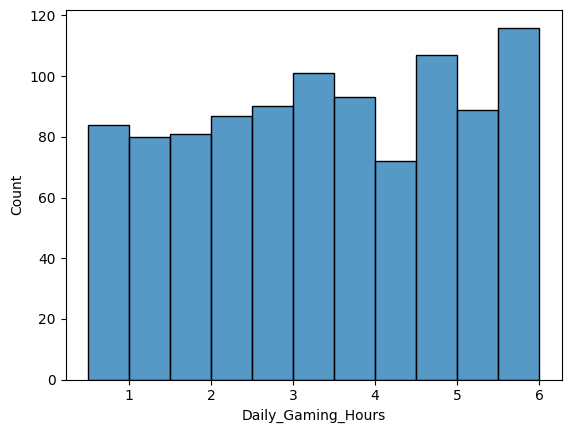

In [112]:
# տպենք օրական խաղային ժամերի մասին ինֆորմացիան ըստ քանակի
sns.histplot(df["Daily_Gaming_Hours"])
plt.show()

<Axes: xlabel='Stress_Level'>

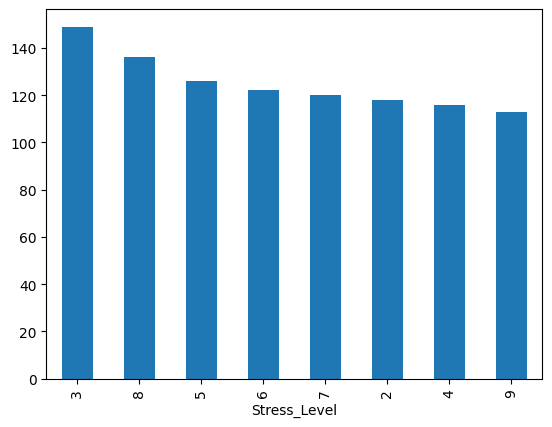

In [113]:
# տպենք ստրեսի մակարդակը ըստ քանակի
df["Stress_Level"].value_counts().plot(kind="bar")

In [114]:
# տվյալների մաքրում

In [115]:
# ցույց տանք դատարկ արժեքները (ընդհանուր ինֆոյում արդեն երևաց որ ամեն ինչ մաքուր է)
df.isna().sum()

User_ID                   0
Age                       0
Gender                    0
Occupation                0
Game_Type                 0
Daily_Gaming_Hours        0
Weekly_Gaming_Hours       0
Primary_Gaming_Time       0
Sleep_Hours               0
Stress_Level              0
Focus_Level               0
Academic_or_Work_Score    0
Productivity_Level        0
Performance_Impact        0
dtype: int64

In [116]:
# տպենք դուբլիկատ տվյալները առանց ուզերի այդիի
df.drop(columns=["User_ID"]).duplicated().sum()

np.int64(0)

In [117]:
Q1 = df["Academic_or_Work_Score"].quantile(0.25)
Q3 = df["Academic_or_Work_Score"].quantile(0.75)
IQR = Q3 - Q1

df[(df["Academic_or_Work_Score"] >= Q1 - 1.5*IQR) & (df["Academic_or_Work_Score"] <= Q3 + 1.5*IQR)]


,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,23,Female,Working Professional,Simulation,4.0,28.0,Morning,7.8,8,4,95,96,Neutral
996,U0997,30,Female,Student,Puzzle,2.9,20.3,Morning,4.9,4,7,62,67,Neutral
997,U0998,18,Male,Working Professional,Action,1.0,7.0,Night,4.6,2,8,92,89,Neutral
998,U0999,25,Female,Student,Simulation,4.5,31.5,Morning,8.4,7,4,70,75,Neutral


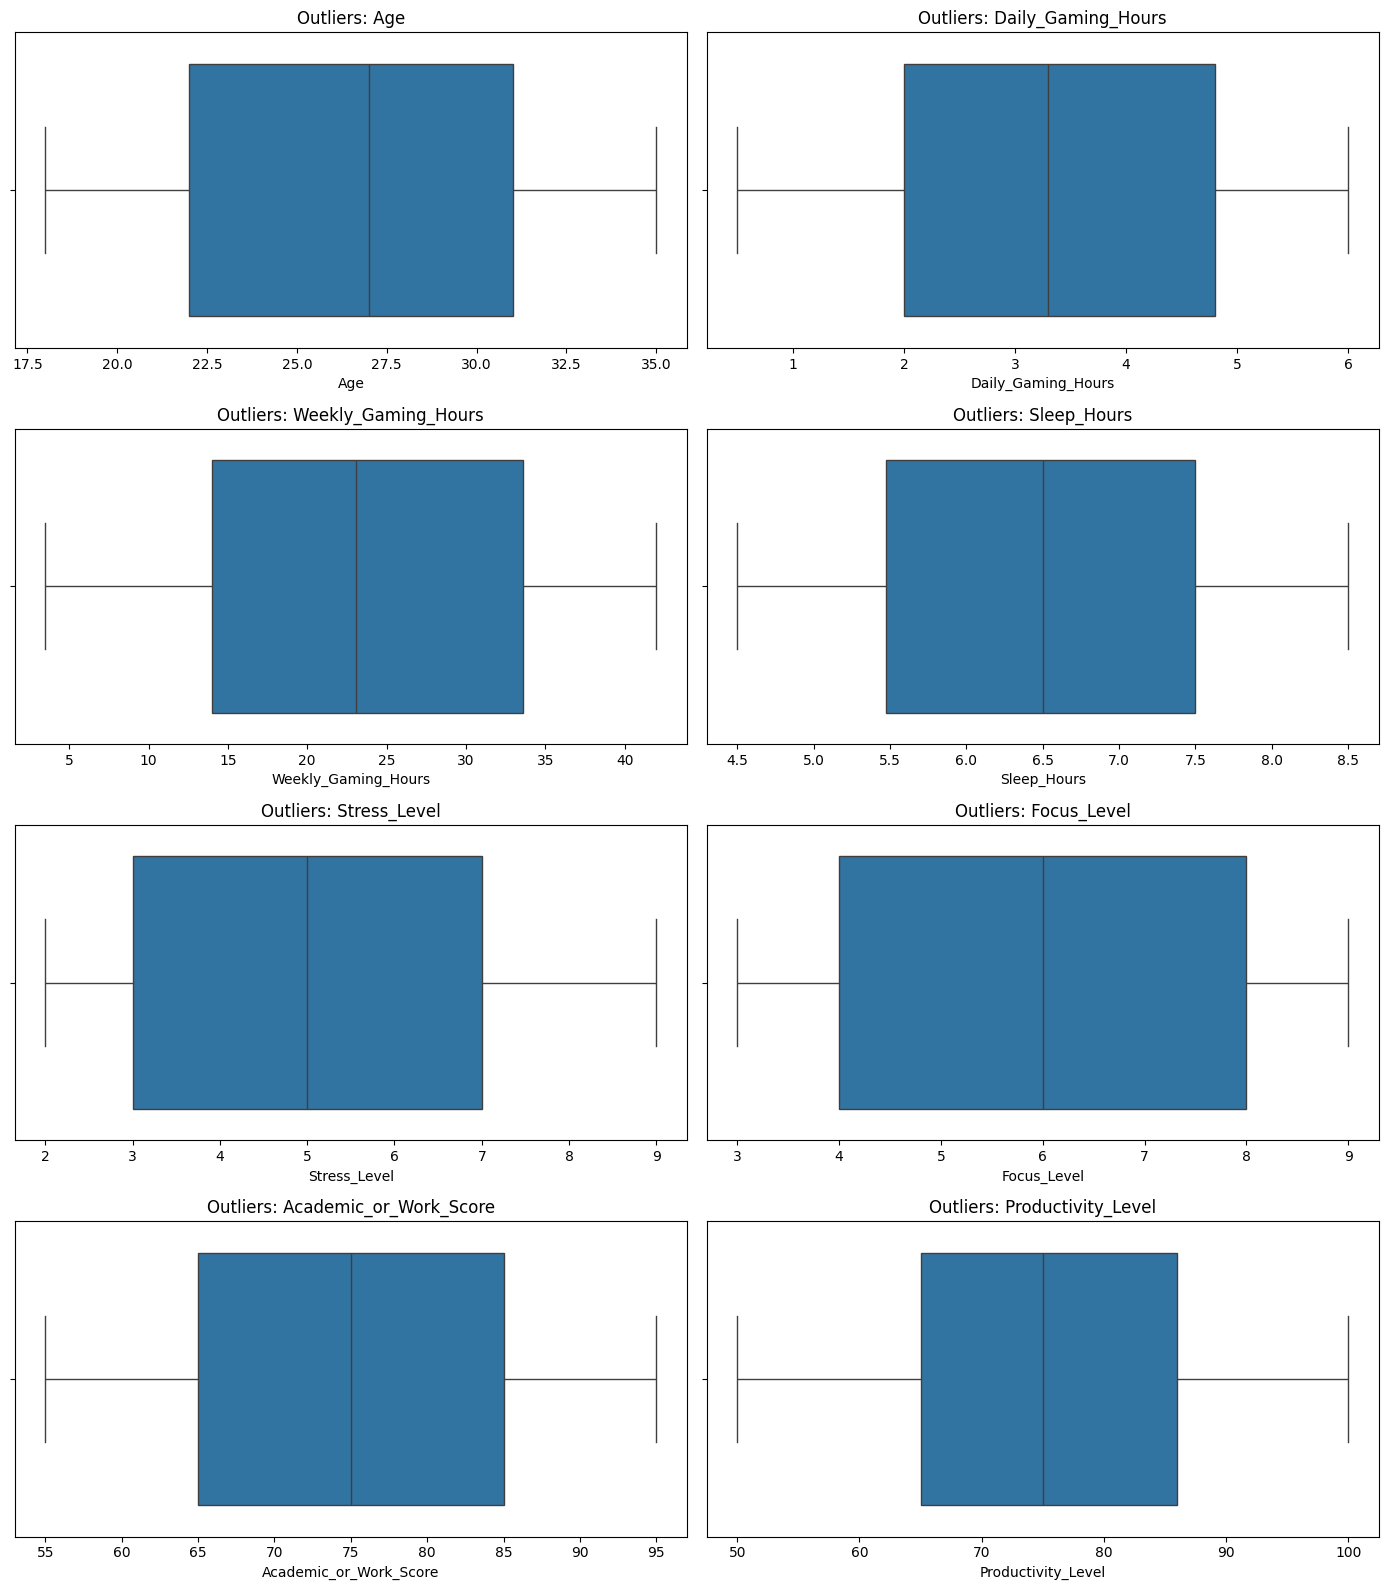

In [118]:
# բոլոր թվային սյուները
num_cols = [
    "Age",
    "Daily_Gaming_Hours",
    "Weekly_Gaming_Hours",
    "Sleep_Hours",
    "Stress_Level",
    "Focus_Level",
    "Academic_or_Work_Score",
    "Productivity_Level"
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers: {col}")


# տպենք բոլոր տվյալենրի boxplot-ները որպեսզի տեսնենք շեղված կետերը
plt.tight_layout()
plt.show()



(1000, 14)
(1000, 24)


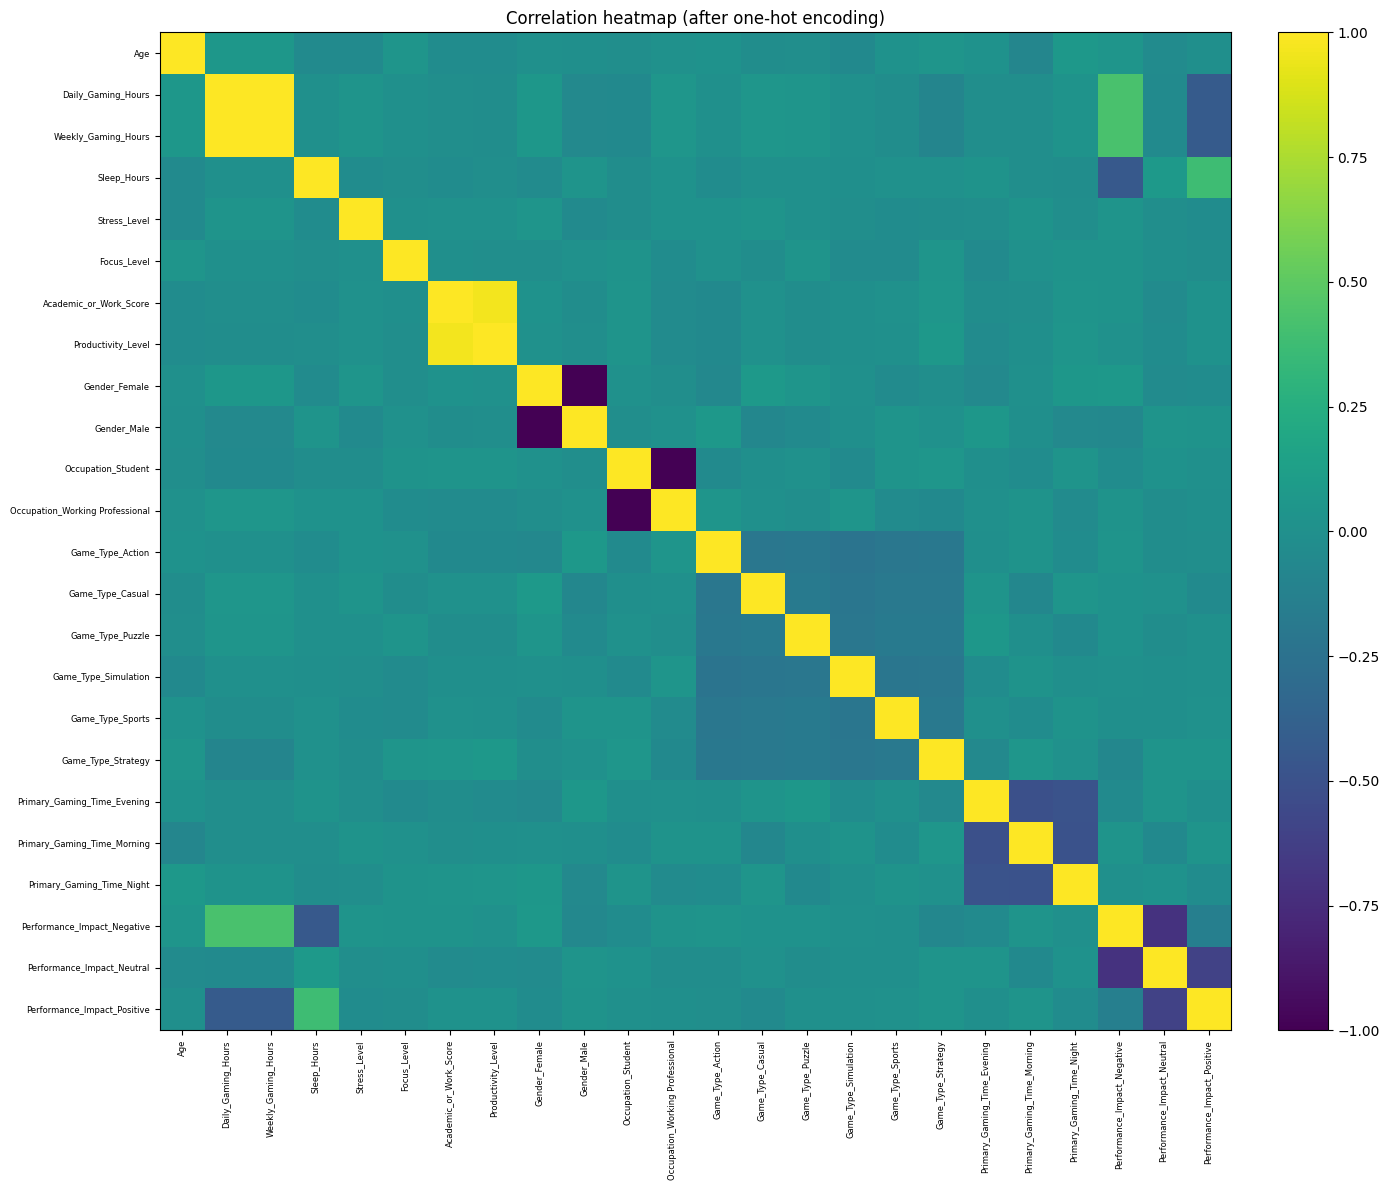

In [119]:
# գնտում ենք բոլոր Object սյուներ
# հանում ենք Id, ամիմաստ է հաշվել դրա կոռելացիան
df_encoded = df.drop(columns=["User_ID"]).copy()
cat_cols = df_encoded.select_dtypes(include=["object"]).columns.tolist()

# ստեղծենք նոր դատաֆրեյմ բոլոր object արժեքները one-hot encodig - ով դարձնելով նոր սյուներ, true false արժեքներով
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=False)

# տպենք հին և նոր դատայի տեսքերը, որպեսզի տեսնենք տարբերությունը
print(df.shape)
print(df_encoded.shape)

# ստեղծենք կոռելյացիայի մատրից
corr = df_encoded.corr(numeric_only=True)

# տպենք heatmap
plt.figure(figsize=(14, 12))
im = plt.imshow(corr.values, aspect="auto")
plt.title("Correlation heatmap (after one-hot encoding)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.index)), corr.index, fontsize=6)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


In [120]:
# feature engineering

In [121]:
df_fe = df.copy()

In [122]:
# ստեղծենք նոր սյուներ (կարող է օգնել եթե օգտագործենք ML մոդելենր ստեղծելիս)

In [123]:
# նոր սյուն որը ցույց կտա խաղային ժամերի և քնի ժամերի հարաբարերությունը
df_fe["Gaming_Sleep_Ratio"] = (
    df_fe["Daily_Gaming_Hours"] / df_fe["Sleep_Hours"]
)

In [124]:
# նոր սյուն որը ցույց կտա սթրեսի մակարդակի և ուշադրության մակարդակի տարբերությունը (ընդհանուր)
df_fe["Stress_Focus_Diff"] = (
    df_fe["Stress_Level"] - df_fe["Focus_Level"]
)

In [125]:
# նոր սյուն որը կդասակարգի տարիքները ըստ խմբերի
df_fe["Age_Group"] = pd.cut(
    df_fe["Age"],
    bins=[0, 18, 25, 35, 50, 100],
    labels=["Teen", "Young", "Adult", "MidAge", "Senior"]
)

In [126]:
# նոր սյուն որը ցույց խաղամոլներին
df_fe["Is_Hardcore_Gamer"] = (
    df_fe["Weekly_Gaming_Hours"] >= 35
).astype(int)


In [128]:
df_fe.head()

,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact,Gaming_Sleep_Ratio,Stress_Focus_Diff,Age_Group,Is_Hardcore_Gamer
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative,0.869565,2,Young,0
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral,0.185185,-5,Adult,0
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive,0.250000,-4,Adult,0
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral,0.204082,0,Adult,0
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral,0.300000,0,Young,0
